Apply the similar steps that you learned in the Data Preprocessing in-class exercise, on Day 2, on this attached weather dataset. Dropping columns is subjective. It's up to you what you think should be dropped or what should be changed. The final objective is to produce cleaned and preprocessed data for an ML based classification algorithm.

Please submit the notebook file (.ipynb) and a cleaned dataset file (.csv).

In [21]:
import pandas as pd
import seaborn as sb
import matplotlib.pyplot as plt

In [22]:
data = pd.read_csv("weather_classification_data.csv")

In [23]:
data.shape

(13200, 11)

In [24]:
data.isnull().sum()

Temperature             0
Humidity                0
Wind Speed              0
Precipitation (%)       0
Cloud Cover             0
Atmospheric Pressure    0
UV Index                0
Season                  0
Visibility (km)         0
Location                0
Weather Type            0
dtype: int64

In [25]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13200 entries, 0 to 13199
Data columns (total 11 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Temperature           13200 non-null  float64
 1   Humidity              13200 non-null  int64  
 2   Wind Speed            13200 non-null  float64
 3   Precipitation (%)     13200 non-null  float64
 4   Cloud Cover           13200 non-null  object 
 5   Atmospheric Pressure  13200 non-null  float64
 6   UV Index              13200 non-null  int64  
 7   Season                13200 non-null  object 
 8   Visibility (km)       13200 non-null  float64
 9   Location              13200 non-null  object 
 10  Weather Type          13200 non-null  object 
dtypes: float64(5), int64(2), object(4)
memory usage: 1.1+ MB


In [26]:
data.duplicated().sum()

np.int64(0)

In [27]:
data['Atmospheric Pressure'].unique()

array([1010.82, 1011.43, 1018.72, ..., 1022.86, 1067.23,  984.27])

In [28]:
data['Cloud Cover'].unique()

array(['partly cloudy', 'clear', 'overcast', 'cloudy'], dtype=object)

In [29]:
data['Weather Type'].unique()

array(['Rainy', 'Cloudy', 'Sunny', 'Snowy'], dtype=object)

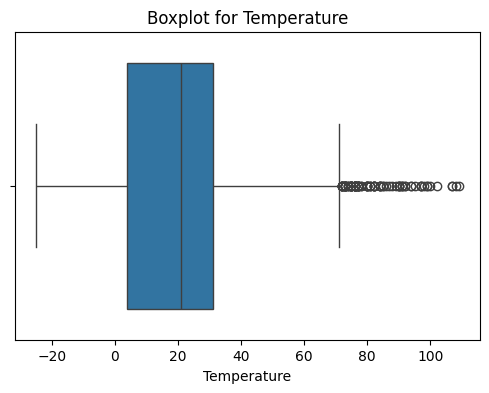

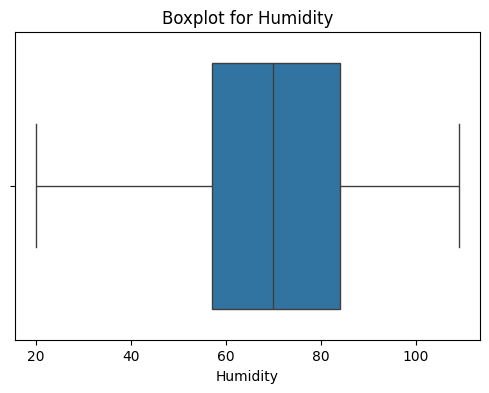

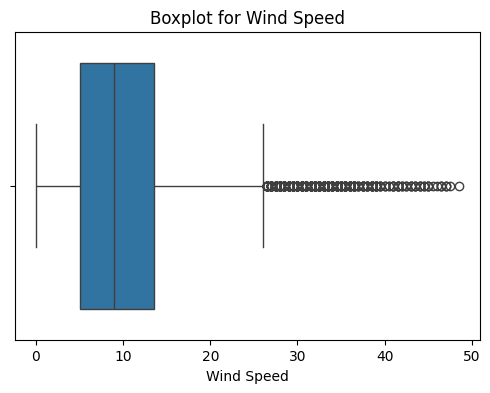

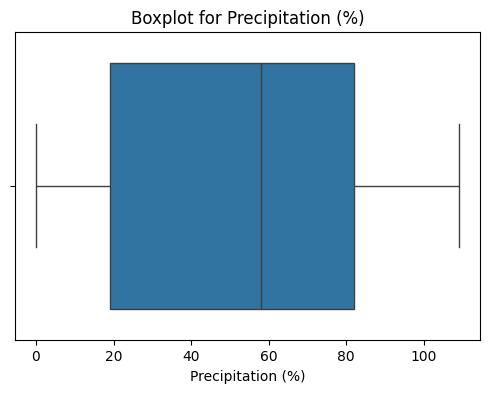

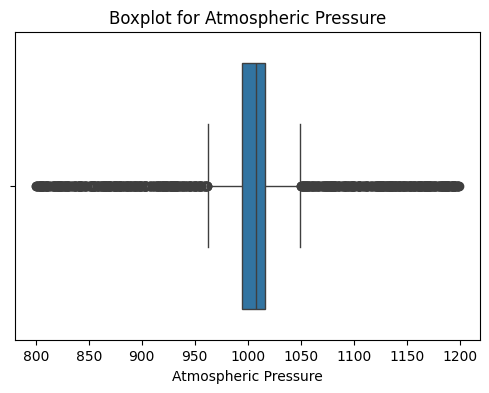

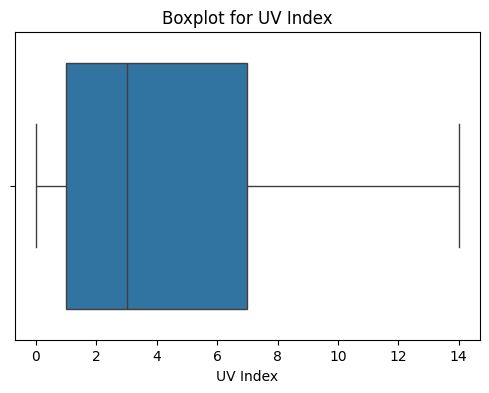

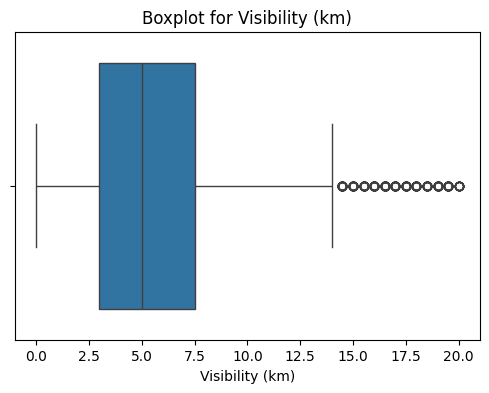

In [30]:
# Select only numerical columns
numeric_cols = data.select_dtypes(include='number').columns

# Loop through numeric columns and plot a separate boxplot for each
for col in numeric_cols:
    plt.figure(figsize=(6, 4))
    sb.boxplot(x=data[col])
    plt.title(f'Boxplot for {col}')
    plt.show()

## Categorical Encoding

In [31]:
data.dtypes

Temperature             float64
Humidity                  int64
Wind Speed              float64
Precipitation (%)       float64
Cloud Cover              object
Atmospheric Pressure    float64
UV Index                  int64
Season                   object
Visibility (km)         float64
Location                 object
Weather Type             object
dtype: object

In [32]:
cols_to_encode = ['Cloud Cover', 'Season', 'Location']

data_ohe = pd.get_dummies(data, columns=cols_to_encode, drop_first=True)

In [33]:
data_ohe.describe()

,Temperature,Humidity,Wind Speed,Precipitation (%),Atmospheric Pressure,UV Index,Visibility (km)
count,13200.000000,13200.000000,13200.000000,13200.000000,13200.000000,13200.000000,13200.000000
mean,19.127576,68.710833,9.832197,53.644394,1005.827896,4.005758,5.462917
std,17.386327,20.194248,6.908704,31.946541,37.199589,3.856600,3.371499
min,-25.000000,20.000000,0.000000,0.000000,800.120000,0.000000,0.000000
25%,4.000000,57.000000,5.000000,19.000000,994.800000,1.000000,3.000000
50%,21.000000,70.000000,9.000000,58.000000,1007.650000,3.000000,5.000000
75%,31.000000,84.000000,13.500000,82.000000,1016.772500,7.000000,7.500000
max,109.000000,109.000000,48.500000,109.000000,1199.210000,14.000000,20.000000


In [34]:
target = 'Weather Type'
X = data_ohe.drop('Weather Type', axis=1)
y = data['Weather Type']

In [35]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

In [36]:
from sklearn.preprocessing import StandardScaler, RobustScaler

df_clean = data_ohe.copy()

# STANDARD SCALER
std_scaler = StandardScaler()
std_cols = [
    'Temperature',
    'Humidity',
    'Atmospheric Pressure',
    'UV Index'
]

X_train[std_cols] = std_scaler.fit_transform(X_train[std_cols])
X_test[std_cols] = std_scaler.transform(X_test[std_cols])

# ROBUST SCALER]
rob_scaler = RobustScaler()
rob_cols = [
    'Wind Speed',
    'Precipitation (%)',
    'Visibility (km)'
]

X_train[rob_cols] = rob_scaler.fit_transform(X_train[rob_cols])
X_test[rob_cols] = rob_scaler.transform(X_test[rob_cols])

df_clean.to_csv("weather_clean.csv", index=False)


In [37]:
X_train.head()

,Temperature,Humidity,Wind Speed,Precipitation (%),Atmospheric Pressure,UV Index,Visibility (km),Cloud Cover_cloudy,Cloud Cover_overcast,Cloud Cover_partly cloudy,Season_Spring,Season_Summer,Season_Winter,Location_inland,Location_mountain
13143,-1.504844,0.071429,-0.882353,0.222222,-0.438371,-0.778137,-0.666667,False,True,False,False,False,True,False,True
5670,-1.216346,-0.424296,0.529412,0.269841,-0.210290,-0.778137,-0.111111,False,True,False,False,False,True,False,True
1113,-1.043247,1.310742,-0.588235,0.619048,-0.483666,-1.037426,-0.444444,False,True,False,False,False,True,True,False
2602,0.053044,-0.473868,0.117647,-0.666667,0.253644,1.555463,1.000000,False,False,True,False,True,False,False,True
10526,0.572340,-1.812326,-0.705882,-0.682540,0.173239,1.814752,0.222222,False,False,False,True,False,False,False,False
